In [0]:
import pandas as pd
import jieba
# 数据源：http://www.sogou.com/labs/resource/ca.php


In [0]:
# 解析原始的数据文件
# 读取类xml格式文件，解析为url/docno/contenttitle/content四列
import os
import numpy as np
import codecs
# news_tensite_xml.smarty.txt是utf-8编码的，需要指定编码格式读取
# file = codecs.open("/content/sample_data/news_tensite_xml.smarty.txt", encoding='utf-8')
# list = []
# dict = {}
# doc = file.readlines()
# for line in doc:
#   if line.startswith("<url>"):
#     url = line[5:-7]
#     dict.update(url = url)
#   if line.startswith("<docno>"):
#     docno = line[7:-9]
#     dict.update(docno = docno)
#   if line.startswith("<contenttitle>"):
#     contenttitle = line[14:-16]
#     dict.update(contenttitle = contenttitle)
#   if line.startswith("<content>"):
#     content = line[9:-11]
#     dict.update(content = content)
#     list.append(dict)
#     dict = {}

# # print(list)
# # 将list转为dataframe
# df_news = pd.DataFrame(list)
# # df_news.dropna(axis=0, how='any', inplace=True)  # inplace=True表示作用在元数据集上
# # df_news = df_news.dropna()
# # 将dataframe存到csv文件中
# # df_news.to_csv('/content/sample_data/news.csv', sep=',', header=True, index=True)
# file.close()


In [0]:

# 基于train.txt、test.txt以及val.txt

file = codecs.open("/content/sample_data/train.txt", encoding='utf-8')
list = []
dict = {}
doc = file.readlines()
for line in doc:
  list_context = line.split("	")
  dict.update(label = list_context[0])
  dict.update(contenttitle = list_context[1])
  dict.update(url = list_context[2])
  dict.update(content = list_context[3])
  list.append(dict)
  dict = {}


# 将list转为dataframe
df_news = pd.DataFrame(list)
df_news.head()
file.close()

In [7]:
df_news.shape
# 10个类别，每个类别5000条文本

(50000, 4)

In [25]:
# 读取content列,返回一个list
content = df_news.content.values.tolist()
# print(content)
print(content[0])

# 类别标签
label = df_news.label.values.tolist()
print(label)

近日，编辑从进口现代合肥地区某经销商处了解到，即日起至６月３０日到该店购买现代飞思现金直降８０００元，目前店内现车充足，颜色齐全，更多详情请咨询经销商，以下是飞思车型最新价格变化表：　７伤汲敌妥钚录鄹癖浠表Ｓ邢殖担颜色全，更多详情请咨询经销商１Ｑ方面：雅科仕（车型　配置　图片　报价）的质保周期为五年不限公里，店内建议保养周期在１万公里，更换一次机油机滤的费用大概在４００元，更换一次机油三滤的费用大概在１７００元，一切保养信息以当天４Ｓ店的保养信息为准。１嗉点评：＝口现代雅科仕是一款极具性价比的豪华车，不管是配置、空间和动力都不输于德系日系豪车，其４．６Ｌ　Ｖ８发动机更是获得了２０１０年全球十佳发动机的称号。即日起到６月３０日购买飞思可享８０００元现金优惠，感兴趣的朋友不妨到电经销商或到店咨询。（文／汽车点评网　易丽君）

['汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车', '汽车

In [9]:
# 得到分词列表
content_s = []
for line in content:
  # jieba.lcut()直接返回分词后的list
  current_segment = jieba.lcut(line)
  if len(current_segment) > 1 and current_segment != '\r\n':
    content_s.append(current_segment)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.874 seconds.
Prefix dict has been built succesfully.


In [0]:
content_s[0]

In [0]:
# 分词结果转为dataframe，方便展示
df_content = pd.DataFrame({'content_s':content_s})
df_content.head

In [0]:
# 加载停用词表
df_stopwords = pd.read_csv("/content/sample_data/stopwords.txt", index_col=False, sep='\t', quoting=3, names=['stopwords'], encoding='utf-8')
df_stopwords

In [0]:
# 删除停用词
def drop_stopwords(contents, stopwords):
  content_c = []  # 存放分词结果。每个文章是list中的一个元素
  all_words = []
  for line in contents:
    line_c = []
    for word in line:
      # 去除停用词，包括空格和数字
      if word in stopwords or word.isspace() or word.isdigit():
        continue
      line_c.append(word)
      all_words.append(str(word))
    content_c.append(line_c)
  return content_c, all_words

contents = df_content.content_s.values.tolist()
stopwords = df_stopwords.stopwords.values.tolist()

content_c, all_words = drop_stopwords(contents, stopwords)

In [0]:
content_c[0]

In [14]:
df_content_c = pd.DataFrame({'content_c':content_c})
df_content_c.head()

,content_c
0,"[近日, 编辑, 进口, 现代, 合肥, 地区, 经销商, 处, 了解, 即日起, 月, 日..."
1,"[说, 代表, 王权, 皇冠, 车型, 配置, 图片, 报价, 并非, 都, 拥有, 皇冠,..."
2,"[今年, 上半年, 日子, 不好过, 的确, 今年, 上半年, 京城, 车市, 并非, 自主..."
3,"[宾利, 展厅, 下午, 点, 以前, 一款, 车, 没有, 揭开, 真面目, 覆盖, 车,..."
4,"[外媒, 消息, 通用汽车公司, 德国, 金属, 工业, 工会, 拟, 月份, 之前, 欧宝..."


In [0]:
df_all_words = pd.DataFrame({'all_words':all_words})

In [16]:
import numpy
# 求出词频并降序排序
words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size})
words_count = words_count.reset_index().sort_values(by=['count'],ascending=False)
words_count.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,all_words,count
10349,中,48212
305766,都,45544
4632,上,44060
166287,月,40046
5965,不,39941


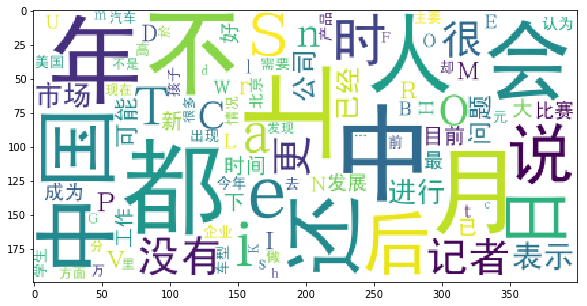

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

# 词云
wordcloud = WordCloud(font_path="/content/sample_data/SimHei.ttf", background_color='white',max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [19]:
# TF-IDF关键词提取
import jieba.analyse
index = 120
print(df_news['content'][index])
content_s_str = "".join(content_s[index])
print(content_s_str)
# 使用jieba分词器，提取文本的关键字
print(" ".join(jieba.analyse.extract_tags(content_s_str, topK=5, withWeight=False)))


标致４００８（车型　配置　图片　报价）、日产逍客（车型　配置　图片　报价）、雪铁龙ＡＩＲＣＲＯＳＳ、斯巴鲁ＸＶ（车型　配置　图片　报价）及三菱ＡＳＸ劲炫（车型　配置　图片　报价），是目前２０万元左右最热门的跨界ＳＵＶ。跨界车型集合轿车舒适性、ＳＵＶ高通过性、ＭＰＶ空间多变性于一身，而跨界ＳＵＶ车型不仅拥有以上特点，在时尚层面上也可与轿跑车相媲美。另外，较高的坐姿、合理的空间设计以及适中的车身尺寸也是其亮点所在。３商指导价：１９．９８万－２３．２８万Ｗ魑２０１２款翼豹（车型　配置　图片　报价）的跨界版车型，斯巴鲁ＸＶ有着与新款翼豹高度相似的外观，无论是大灯、格栅还是发动机盖上的的隆起，都给一人一种似曾相识的感觉。通过大量的镀铬装饰，斯巴鲁ＸＶ的前脸造型充分迎合了国内消费者的审美，而侧面流线型的车身设计也充分的展现了ＸＶ的时尚动感。而在尾部圆润饱满的设计不仅保证了后排乘客的头部空间，也使整个尾部造型充满张力。Ｄ谑畏矫妫大到风格设计，小到按钮造型，斯巴鲁ＸＶ都与全新的翼豹如出一辙，不过这次在仪表板、中央扶手和车门内侧都使用了软性材料。配置方面，电动调节后视镜、可按比例放倒的后排座椅、车外温度检测系统、多功能显示屏、发动机电子防盗等均为标准配置。高配车型还具备多功能方向盘、前排座椅加热、车内空气检测系统、自动头灯等功能。６力方面，斯巴鲁ＸＶ搭载２．０Ｌ水平对置引擎，最大功率１１０ｋＷ／６２００ｒｐｍ，最大扭矩１９６Ｎｍ／４２００ｒｐｍ，搭配ＣＶＴ变速箱，燃油经济性得到保证。另外，斯巴鲁ＸＶ也全系标配了左右对称的全时四驱系统，悬挂则采用和翼豹相同的前麦弗逊后双叉臂结构，这将使它的操控性值得期待。而斯巴鲁最新的行车安全辅助系统“ＥｙｅＳｉｇｈｔ”也将装备于ＸＶ之中。１嗉点评：Ｋ拱吐常兀质且豢钤谝肀平台衍生出的新车型，以满足消费者对ＳＵＶ车型的钟爱需求。价格方面，也是ＸＶ的优势之一，与同级别的途观（车型　配置　图片　报价）、ＣＲ－Ｖ（车型　配置　图片　报价）、ＲＡＶ４站在同一水平线，使其增强了市场竞争力。对于喜好运动风格的年轻消费者来说是个不错的选择。

标致４００８（车型　配置　图片　报价）、日产逍客（车型　配置　图片　报价）、雪铁龙ＡＩＲＣＲＯＳＳ、斯巴鲁ＸＶ（车型　配置　图片　报价）及三菱ＡＳＸ劲炫（车型　配置　图片　报价），是目前２０万元左右最热门的跨界ＳＵＶ。跨界车型集

In [0]:
# LDA主题模型：lda包括文章，主题和词
from gensim import corpora, models, similarities
import gensim
# 做映射，相当于词袋
dictionary = corpora.Dictionary(content_c)
corpus = [dictionary.doc2bow(sentence) for sentence in content_c]
# num_topics表示设置主题的个数
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)


In [21]:
# 一号分类结果
print(lda.print_topic(1, topn=5))

0.010*"都" + 0.009*"不" + 0.008*"人" + 0.007*"会" + 0.007*"说"


In [22]:
# 打印出10个主题的关键词
for topic in lda.print_topics(num_topics=10,num_words=5):
  print(topic)

(0, '0.006*"搭配" + 0.003*"Ｓ" + 0.003*"时尚" + 0.003*"黑色" + 0.003*"更"')
(1, '0.010*"都" + 0.009*"不" + 0.008*"人" + 0.007*"会" + 0.007*"说"')
(2, '0.007*"中" + 0.006*"上" + 0.005*"时尚" + 0.004*"拍摄" + 0.004*"设计"')
(3, '0.011*"饰演" + 0.008*"结婚" + 0.004*"脂肪" + 0.004*"婚礼" + 0.003*"老公"')
(4, '0.007*"日本" + 0.006*"日" + 0.005*"护肤" + 0.005*"月" + 0.005*"歌迷"')
(5, '0.010*"中国" + 0.010*"月" + 0.009*"日" + 0.009*"年" + 0.005*"中"')
(6, '0.008*"发展" + 0.006*"工作" + 0.005*"教育" + 0.004*"问题" + 0.004*"年"')
(7, '0.034*"ｅ" + 0.033*"ａ" + 0.025*"ｉ" + 0.023*"ｒ" + 0.023*"ｏ"')
(8, '0.012*"月" + 0.010*"叙利亚" + 0.008*"年" + 0.008*"航天员" + 0.008*"分"')
(9, '0.009*"都" + 0.006*"中" + 0.005*"很" + 0.005*"上" + 0.005*"不"')


In [26]:
# 将内容和对应的标签转为dataFrame显示
df_train = pd.DataFrame({'content_c':content_c, 'label':label})
df_train.head()

,content_c,label
0,"[近日, 编辑, 进口, 现代, 合肥, 地区, 经销商, 处, 了解, 即日起, 月, 日...",汽车
1,"[说, 代表, 王权, 皇冠, 车型, 配置, 图片, 报价, 并非, 都, 拥有, 皇冠,...",汽车
2,"[今年, 上半年, 日子, 不好过, 的确, 今年, 上半年, 京城, 车市, 并非, 自主...",汽车
3,"[宾利, 展厅, 下午, 点, 以前, 一款, 车, 没有, 揭开, 真面目, 覆盖, 车,...",汽车
4,"[外媒, 消息, 通用汽车公司, 德国, 金属, 工业, 工会, 拟, 月份, 之前, 欧宝...",汽车


In [27]:
df_train.tail()

,content_c,label
49995,"[女, 小, 三, 不同, 不, 结婚, 目的, 不, 喜欢, 婚姻, 舒服, 感, 才, ...",时尚
49996,"[岁, 窦靖童, 身材, 丰满, 激凸, 晒长, 腿]",时尚
49997,"[问, 中国, 流行, 乐坛, 定海神针, 级别, 人物, 刘欢, 一定, 会, 很多, 人...",时尚
49998,"[传大, Ｓ, 确诊, 不孕, 精神, 崩溃, 揭其, 婚后, 生活, 张, 炻, 岁, 大...",时尚
49999,"[有个, 女孩, 非常, 失落, 几个, 月, 前, 失恋, 女孩, 还, 非常, 郁闷, ...",时尚


In [28]:
# 将10个标签映射为数字0-9
label_mapping = {'汽车':1, '财经':2, '科技':3, '健康':4, '体育':5, '教育':6, '文化':7, '军事':8, '娱乐':9, '时尚':10 }
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,content_c,label
0,"[近日, 编辑, 进口, 现代, 合肥, 地区, 经销商, 处, 了解, 即日起, 月, 日...",1
1,"[说, 代表, 王权, 皇冠, 车型, 配置, 图片, 报价, 并非, 都, 拥有, 皇冠,...",1
2,"[今年, 上半年, 日子, 不好过, 的确, 今年, 上半年, 京城, 车市, 并非, 自主...",1
3,"[宾利, 展厅, 下午, 点, 以前, 一款, 车, 没有, 揭开, 真面目, 覆盖, 车,...",1
4,"[外媒, 消息, 通用汽车公司, 德国, 金属, 工业, 工会, 拟, 月份, 之前, 欧宝...",1


In [29]:
df_train.tail()

,content_c,label
49995,"[女, 小, 三, 不同, 不, 结婚, 目的, 不, 喜欢, 婚姻, 舒服, 感, 才, ...",10
49996,"[岁, 窦靖童, 身材, 丰满, 激凸, 晒长, 腿]",10
49997,"[问, 中国, 流行, 乐坛, 定海神针, 级别, 人物, 刘欢, 一定, 会, 很多, 人...",10
49998,"[传大, Ｓ, 确诊, 不孕, 精神, 崩溃, 揭其, 婚后, 生活, 张, 炻, 岁, 大...",10
49999,"[有个, 女孩, 非常, 失落, 几个, 月, 前, 失恋, 女孩, 还, 非常, 郁闷, ...",10


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['content_c'].values, df_train['label'].values, random_state=1)
print(x_train.shape)  # numpy.ndarray
print(x_test.shape)

(37500,)
(12500,)


In [40]:
x_train

array([list(['导读', '年', '高考', '已', '结束', '大家', '最', '关注', '年', '全国', '新课标', '卷', '高考作文', '写', '是否', '符合', '作文', '命题', '要求', '笔者', '第一', '时间', '访问', '全国', '中', '高考', '备考', '指导', '中心', '主任', '国家', '创新', '教育', '课题组', '成员', '中国', '远程教育', '网络', '中心', '主任', '全国', '学雷锋', '树新风', '宣讲团', '副团长', '张峰', '教授', '张峰', '教授', '长期', '从事', '高考', '命题', '研究', '教学', '工作', '连续', '三年', '考前', '正确', '预测', '全国', '新课标', '卷', '高考作文', '中心思想', '今年', '全国', '多个', '地区', '进行', '高考', '备考', '指导', '考前', '一次', '正确', '预测', '年', '全国', '新课标', '卷', '高考作文', '中心思想', '张峰', '教授', '针对', '年', '全国', '新课标', '卷', '高考作文', '进行', '点评', '欢迎', '大家', '共同', '参与', 'Ｖ', '鞒', '秩耍', '赫欧', '褰', '淌', '谇', '肽', '年', '全国', '新课标', '卷', '高考作文', '进行', '总题', '点评', 'Ｕ', '欧', '褰', '淌', '冢', '航衲', '辏', 'ǎ', '玻埃', '保材', '辏', '┑', '母呖', '甲', '魑模', '全国', '卷及', '各省', '卷', '命题', '方向', '来看', '方向', '促进', '社会', '和谐', '稳定', '社会公德', '关注', '平凡', '岗位', '上', '不', '平凡', '使命', '社会', '责任', '珍惜', '现代', '幸福生活', '领悟', '深刻', '做人', '道理', '勿', '善小而', '不', '倡导', '责任感', '使命感', '要说',

In [41]:
y_train

array([ 6, 10,  6, ...,  2,  3,  7])

In [43]:
words = []
for line_index in range(len(x_train)):
  try:
    words.append(' '.join(x_train[line_index]))
  except:
    print(line_index,word_index)
words[0]

'导读 年 高考 已 结束 大家 最 关注 年 全国 新课标 卷 高考作文 写 是否 符合 作文 命题 要求 笔者 第一 时间 访问 全国 中 高考 备考 指导 中心 主任 国家 创新 教育 课题组 成员 中国 远程教育 网络 中心 主任 全国 学雷锋 树新风 宣讲团 副团长 张峰 教授 张峰 教授 长期 从事 高考 命题 研究 教学 工作 连续 三年 考前 正确 预测 全国 新课标 卷 高考作文 中心思想 今年 全国 多个 地区 进行 高考 备考 指导 考前 一次 正确 预测 年 全国 新课标 卷 高考作文 中心思想 张峰 教授 针对 年 全国 新课标 卷 高考作文 进行 点评 欢迎 大家 共同 参与 Ｖ 鞒 秩耍 赫欧 褰 淌 谇 肽 年 全国 新课标 卷 高考作文 进行 总题 点评 Ｕ 欧 褰 淌 冢 航衲 辏 ǎ 玻埃 保材 辏 ┑ 母呖 甲 魑模 全国 卷及 各省 卷 命题 方向 来看 方向 促进 社会 和谐 稳定 社会公德 关注 平凡 岗位 上 不 平凡 使命 社会 责任 珍惜 现代 幸福生活 领悟 深刻 做人 道理 勿 善小而 不 倡导 责任感 使命感 要说 一句 全 涵盖 话 雷锋精神 如果说 考前 讲 今年 高考 命题 方向 弘扬 雷锋精神 现在 考试 结束 说 预测 正确 今年 高考作文 弘扬 时代 正气 彰显 雷锋精神 提高 公民 素养 体现 社会风尚 主旋律 Ｖ 鞒 秩耍 赫 沤 淌 凇 ⒑ 颖 庇 幸桓 隹 忌 说 高考 前 石家庄市 燕赵 讲坛 讲过 今年 高考作文 说 今年 高考作文 应 雷锋精神 社会 文明 思想 道德观念 内容 想 说 今年 新课标 全国 卷 作文题目 船主 漆工 请问 张 教授 雷锋精神 联系 上 Ｕ 欧 褰 淌 冢 晃 铱 梢 庋 说 船主 漆工 漆工 干 好 本职工作 船主 著想 顺便 漏洞 补好 避免 一场 海难 挽救 别人 生命 财产 得到 船主 酬谢 漆工 诚心诚意 去 补漏 没有 想 什 麽 回报 却 遇到 懂得 感恩 船主 得到 巨额 赠金 留下 一段 诚心 补漏 手有余香 知恩图报 真心 感恩 佳话 船主 漆工 故事 告诉 每个 人 都 雷锋 立足 岗位 忠 於 职守 勤勉 敬业 做好 本职工作 雷锋精神 Ｖ 鞒 秩耍 赫欧 褰 淌 冢 今年 全国 新课标 卷 高考作文 船主 漆工 同学 认为 题 

In [46]:
# 将词转为向量
from sklearn.feature_extraction.text import CountVectorizer
# 举例子,假设有三篇文章，分词后的结果texts
texts = ['dog cat fish pig', 'dog cat cat fish', 'pig dog fish fish']
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))


['cat', 'dog', 'fish', 'pig']
[[1 1 1 1]
 [2 1 1 0]
 [0 1 2 1]]
[3 3 4 2]


In [57]:
# 除了词袋模型和tf-idf向量化方式，还有ngram和word2vec等
# 将词转为向量
from sklearn.feature_extraction.text import CountVectorizer
# 举例子,假设有三篇文章，分词后的结果texts
texts = ['dog cat fish pig', 'dog cat cat fish', 'pig dog fish fish']
# 取n个连续词
cv = CountVectorizer(ngram_range=(1,4))  
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))

['cat', 'cat cat', 'cat cat fish', 'cat fish', 'cat fish pig', 'dog', 'dog cat', 'dog cat cat', 'dog cat cat fish', 'dog cat fish', 'dog cat fish pig', 'dog fish', 'dog fish fish', 'fish', 'fish fish', 'fish pig', 'pig', 'pig dog', 'pig dog fish', 'pig dog fish fish']
[[1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0]
 [2 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 2 1 0 1 1 1 1]]
[3 1 1 2 1 3 2 1 1 1 1 1 1 4 1 1 2 1 1 1]


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# 使用词袋模型进行文本向量化
vec = CountVectorizer(analyzer='word', max_features=4000, lowercase=False)
# vec = CountVectorizer(ngram_range=(1,4), analyzer='word', max_features=4000, lowercase=False)
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=4000, min_df=1,
                ngram_range=(1, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [60]:
# 使用朴素贝叶斯进行新闻多分类（这里是10个类别）
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
test_words = []
for line_index in range(len(x_test)):
  try:
    test_words.append(' '.join(x_test[line_index]))
  except:
    print(line_index, word_index)
print(len(test_words))
print(test_words[0])

12500
新 变化 年 山东 高考 专科 本市 报考 优势 不再 萁 樯 埽 山东省 招考 院 政策 调整 年 专科 录取 批次 专科 批 济南 青岛 分 单列 优惠 专科 批 不再 发挥作用 填报 专科 志愿 前 山东省 招考 院 会 划定 填报 志愿 最低 资格 线 录取 时 会 相应 划定 录取 最低 分数线 两条线 都 全省 统一 去年 分 不再 分地市 划定 菹 ぁ 往年 山东省 专科 录取 分 专科 一批 专科 二批 两个 批次 山东省 本科 二批 划定 四条线 青岛 二本 线 省属 线低 分 优惠 延续 专科 一批 部分 分数 低 青岛 考生 去 不错 专科 一批 高校 今年 专科 一批 专科 二批 合并 后 青岛 考生 优势 荡然无存 所有 学校 都 是从 高分 低分 录取 所有 市 考生 一视同仁 Ｓ 邢拗 疲鹤科 艺术 体育类 普通 文理 类 不能 兼报 玻埃 保材晟蕉省 专科 录取 批次 专科 批 包含 普通 文理 艺术 体育 所有 类别 投档 录取 时间 都 相同 专科 艺术 体育 考生 填报 志愿 包括 征集 志愿 时 选报 艺术 体育类 普通 文理 类 进行 填报 不可 兼报 Ｕ 庖 簿 鸵 馕 吨 艺术 生 填报 专科 志愿 时 抛 去 艺术 生 身份 选择 填报 普通 文理 类 志愿 不 兼报 艺术类 普通 文理 类 志愿 Ｍ 年 山东省 专科 录取 分 专科 一批 专科 二批 时 艺术类 考生 只 专科 一批 录取 艺术 生 专科 一批 填写 艺术类 志愿 专科 二批 兼报 普通 文理 类 志愿 录取 并不矛盾 今年 两全其美 事情 不再 Ｒ 帐踝 科批 设一 志愿 二次 征集 志愿 志愿 二次 征集 志愿 均 只 填报 高校 志愿 专业 志愿 专业 是否 服从 调剂 志愿 第二次 征集 志愿 增加 美术 类 专业 高校 是否 服从 调剂 志愿 三次 志愿 填报 时间 分别 月 日 志愿 ﹔ 月 日 第一次 征集 志愿 ﹔ 月 日 第二次 征集 志愿 呖甲科 志愿 只能 填报 三次 玻埃 保材晟蕉省 专科 志愿 填报 三次 机会 月 日 专科 高职 批一 志愿 填报 考生 填报 院校 六个 专业 选 院校 专业 是否 服从 调剂 志愿 ﹔ 月 日 专科 第一次 征集 志愿 考生 填报 院校 每所 学校 填报 六个 专业 选 院校 

In [62]:
# 输入测试集进行预测，transform就是计算文本特征词汇频数矩阵
classifier.score(vec.transform(test_words), y_test) 
# 0.76632 

0.76592

In [63]:
# td-idf计算
# 使用td-idf模型进行文本向量化
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', max_features=4000, lowercase=False)
# 计算训练集合文本中每个单词的tf-idf值
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=4000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [64]:
# 基于tf-idf值向量化后的结果输入朴素贝叶斯进行新闻多分类（这里是10个类别）
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()
classifier1.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
# 预测结果,发现结果较词袋模型的向量化结果有提高
classifier1.score(vectorizer.transform(test_words), y_test)
# 0.78024

0.78024